In [26]:
# clusterin in scikit-learn 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [4]:
# Generate sample data
n_samples = 300
n_features = 2
n_clusters = 3
random_state = 42

In [7]:
X, y = make_blobs(n_samples=n_samples, 
                  n_features=n_features, 
                  centers=n_clusters, 
                  random_state=random_state)

In [ ]:
# Visualize the data
plt.scatter(X[:, 0], X[:, 1], s=3)
plt.title("Generated Data")
plt.show()

In [ ]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans.fit(X)

In [16]:
# Retrieve cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [ ]:
# Visualize the clusters
for i in range(n_clusters):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("KMeans Clustering")
plt.legend()
plt.show()

In [18]:
# tree based clustering method 
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import dendrogram, linkage 

In [21]:
# Apply Agglomerative Clustering
cluster_model = AgglomerativeClustering(n_clusters=3, metric = 'euclidean', linkage='ward')
labels = cluster_model.fit_predict(X)

In [ ]:
# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Clusters from Agglomerative Clustering")
plt.show()

In [23]:
# Perform hierarchical clustering
linked = linkage(X, method='ward')  # 'ward' minimizes the variance within clusters

In [ ]:
# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, truncate_mode='level', p=5)  # Truncate to show the top levels
plt.title("Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

In [27]:
# How many clusters do you need?
inertias = [] 
size = range(2, 10) 
for k in size:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(X)
    inertias.append(k2.inertia_)

In [28]:
print(inertias)

[5763.464789461435, 566.8595511244131, 497.0339881495211, 428.21421299328415, 375.06592487762435, 308.1983661041825, 272.4057314987481, 234.28072349591133]


Text(0, 0.5, 'Inertia')

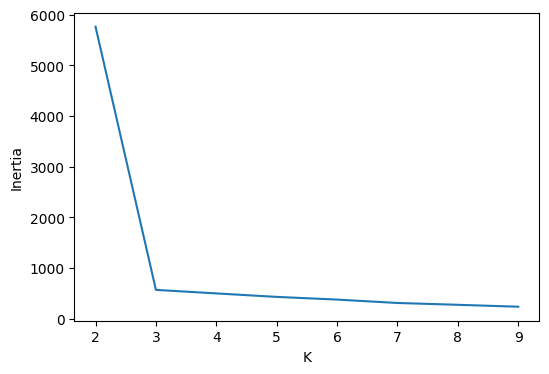

In [ ]:
# decide how many cluster you need based on 'scree plot', did you find the 'elbow' 
# it is K = 3, where the elbow is formed

fig, ax = plt.subplots(figsize = (6, 4))
pd.Series(inertias, index=size).plot(ax=ax) 
ax.set_xlabel("K")
ax.set_ylabel("Inertia")